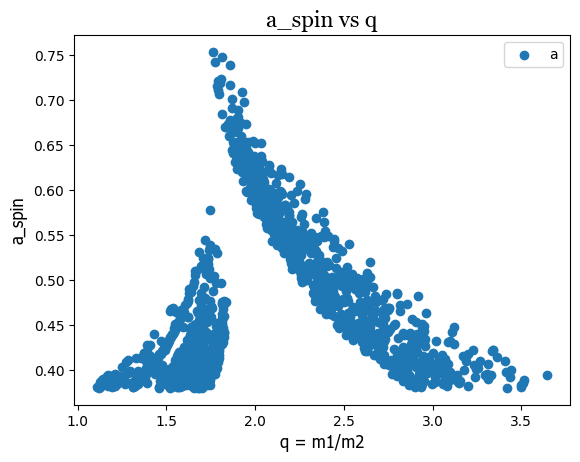

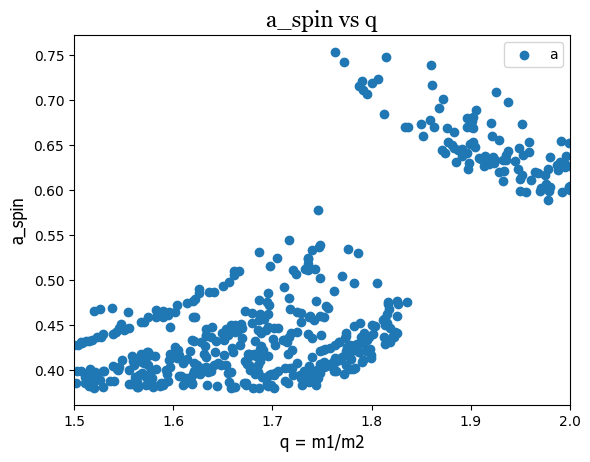

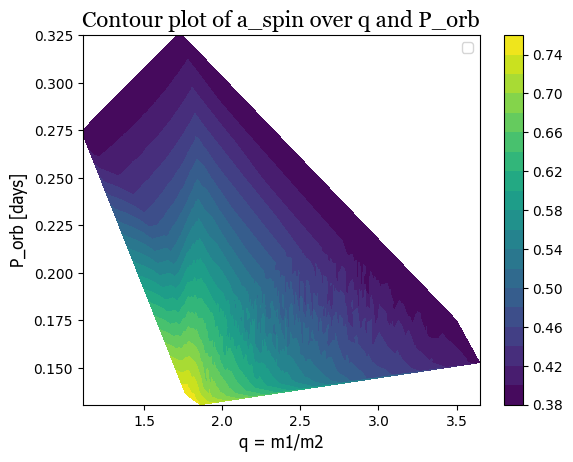

In [11]:
# plots for freq ok cases (where time is also unter 2M)

# important libs and constants
import plot_utils as p
import numpy as np
import csv
G = 6.674e-11  # N*m^2/Kg^2
Msolar = 1.989e30  # kg
Rsolar = 6.957e8  # in m
c = 299792458.0  # m/s

# containers for all solutions (for combined plots)
all_q = []
all_a_spin = []
all_kQ = []
all_P_orb = []

with open("freq_ok.csv", "r") as o:
    reader = csv.DictReader(o)
    for row in reader:
        sol_id = row["ID"]

        data = np.load(f"solutions/{sol_id}.npz")
        t = data["t"]
        f = data["f"]
        Omega = data["Omega"]

        # read metadata from csv
        m1 = float(row["m_WR/M_Sun"])
        m2 = float(row["m_companion/M_Sun"])
        a0 = float(row["initial separation a0 (m)"])
        Omega0 = float(row["initial spin Omega0 (Hz)"])
        f0 = float(row["initial frequency f0 (Hz)"])
        k = float(row["k"])
        Q = float(row["Q"])
        R1 = float(row["WR star Radius R_WR"])
        lifetime = float(row["lifetime (years)"])
        T_TF = float(row["tidal function timescale (years)"])
        f_final = float(row["f_final (Hz)"])
        Omega_final = float(row["Omega_final (Hz)"])
        J = float(row["final angular momentum J (kg m^2/s)"])
        a_spin = float(row["spin parameter a_spin"])
        a_final = float(row["final separation a_final (m)"])
        a_min_si = float(row["minimum separation a_min (m)"])
        q = m1/m2

        all_q.append(q)
        all_a_spin.append(a_spin)
        all_kQ.append(k/Q)
        all_P_orb.append(2/f_final)

q_array = np.array(all_q)
a_spin_array = np.array(all_a_spin)
kQ_array = np.array(all_kQ)
P_orb_array = np.array(all_P_orb)

# plot a_spin vs q
p.scatter2d(q_array, a_spin_array, xlabel='q = m1/m2',
            ylabel='a_spin', title=f"a_spin vs q", legend='a_spin(q)', colour=None, axis_font='Tahoma', axis_size=12, title_font='Georgia', title_size=16, legend_size=10)

p.scatter2d(q_array, a_spin_array, xlabel='q = m1/m2',
            ylabel='a_spin', title=f"a_spin vs q", legend='a_spin(q)', colour=None, xlim=(1.5, 2), axis_font='Tahoma', axis_size=12, title_font='Georgia', title_size=16, legend_size=10)

# plot q vs k/Q with a contour for a_spin
p.plot2d_contour(q_array, P_orb_array/(3600*24), a_spin_array, xlabel='q = m1/m2', ylabel='P_orb [days]',
                 title=f"Contour plot of a_spin over q and P_orb", legend='a_spin(q, k/Q)', axis_font='Tahoma', axis_size=12, title_font='Georgia', title_size=16, legend_size=10)

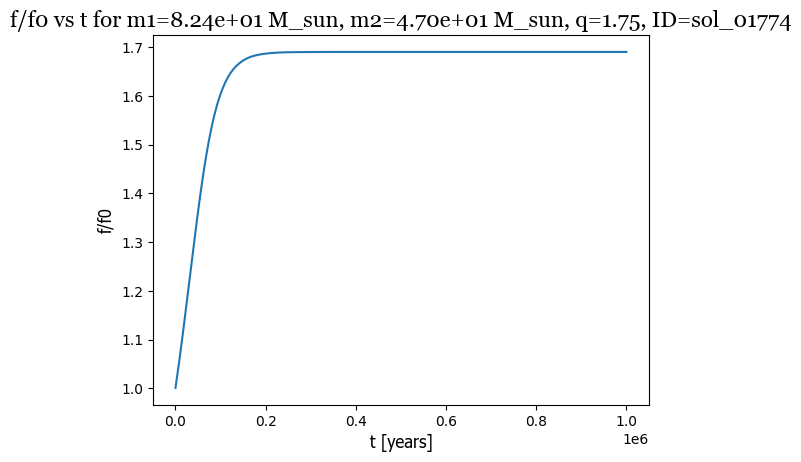

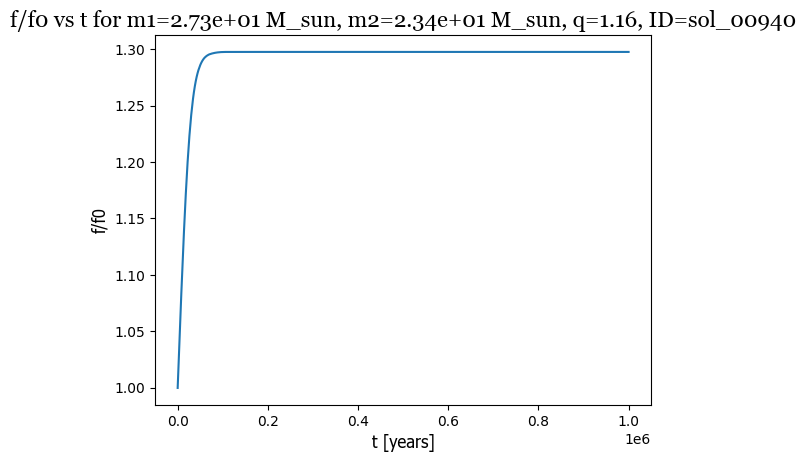

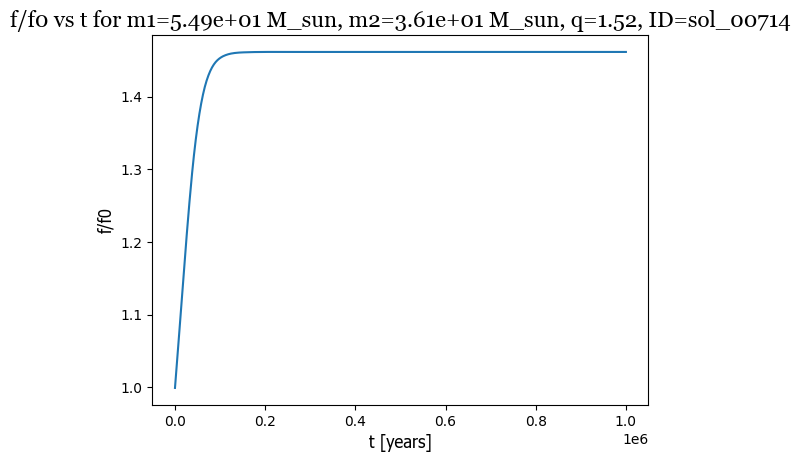

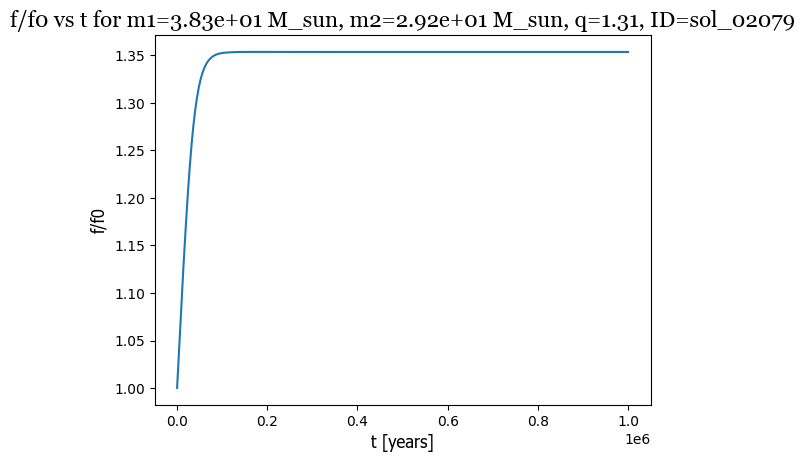

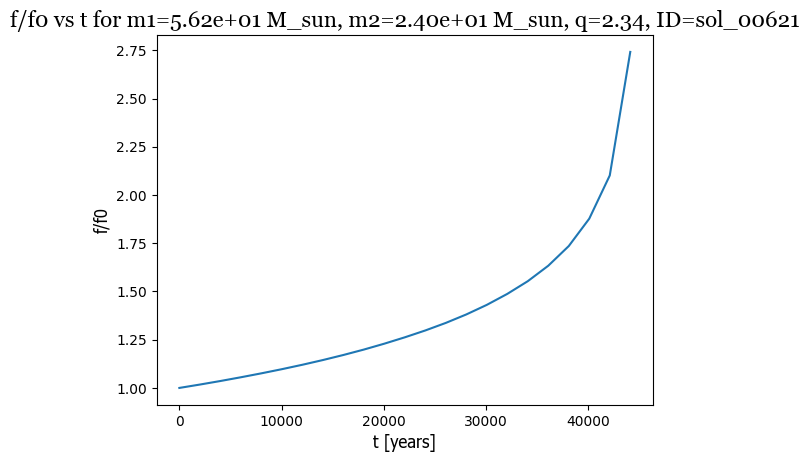

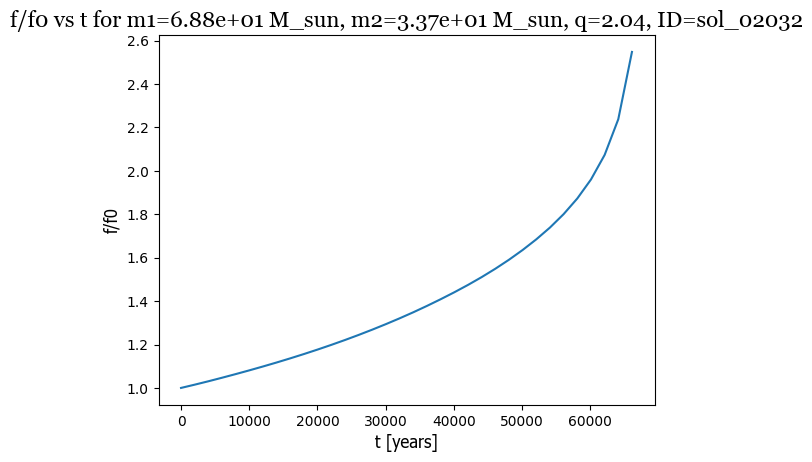

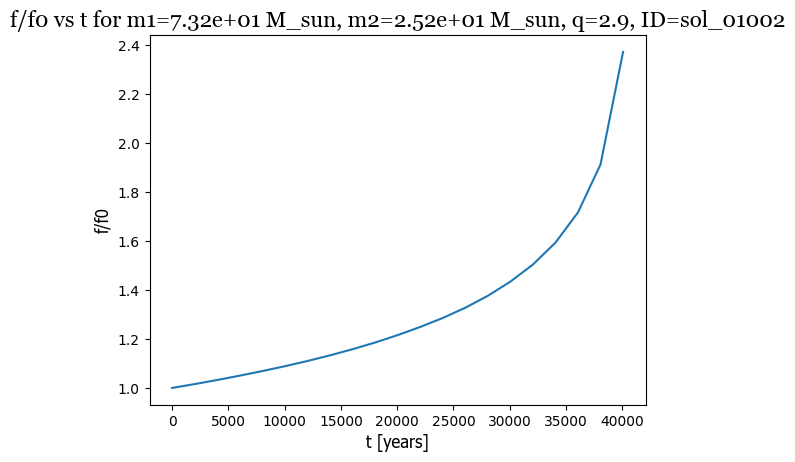

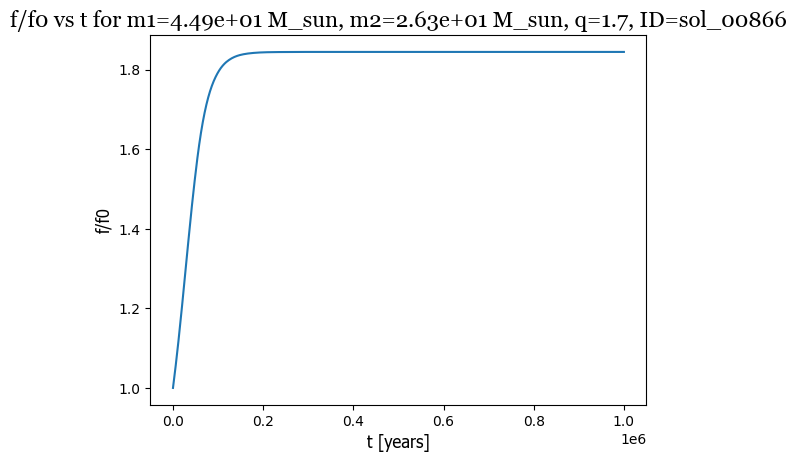

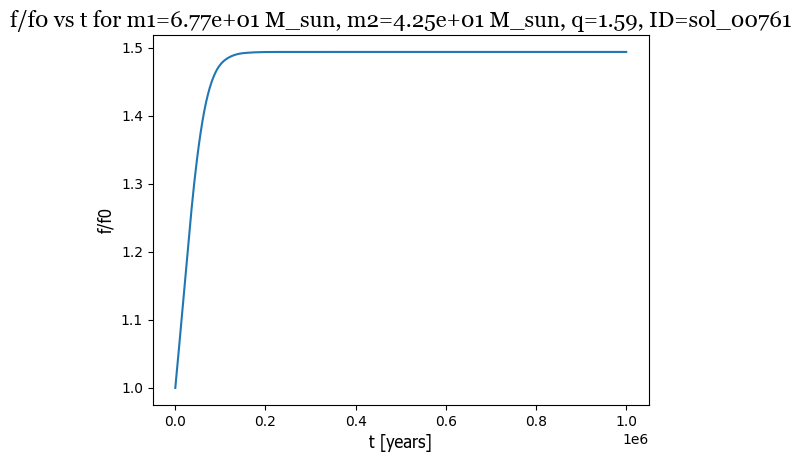

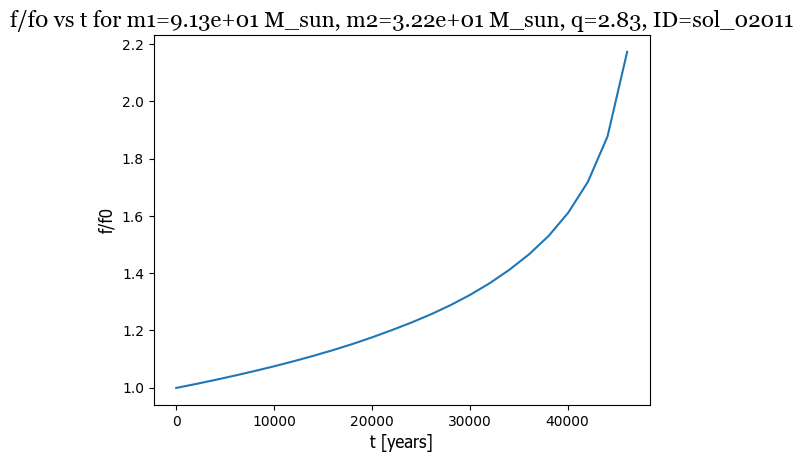

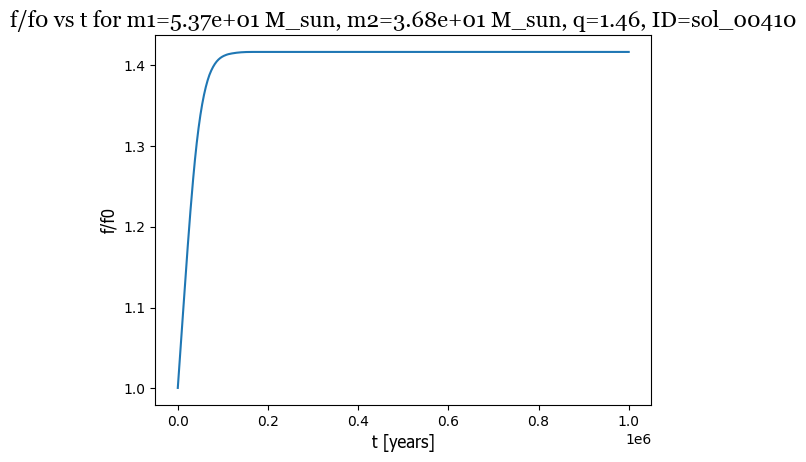

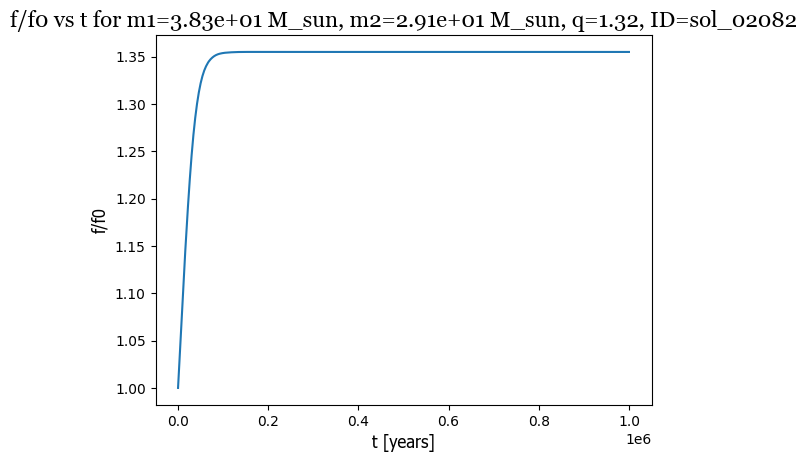

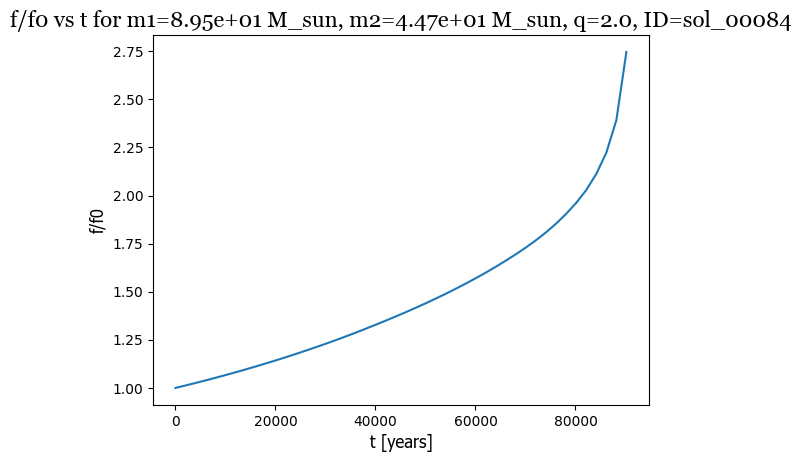

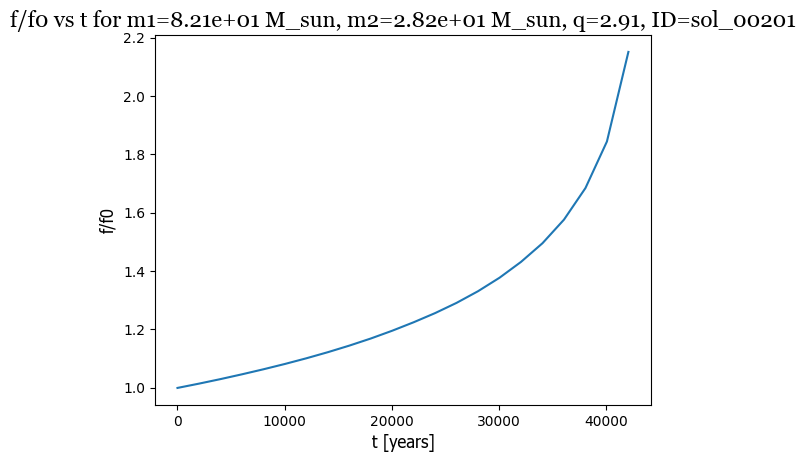

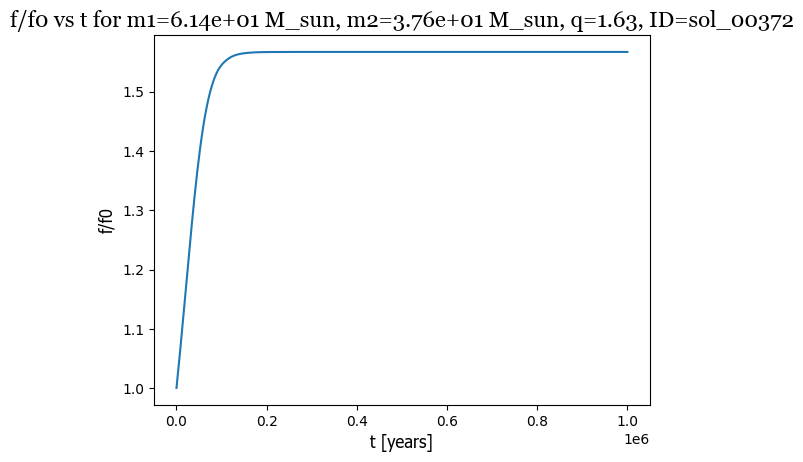

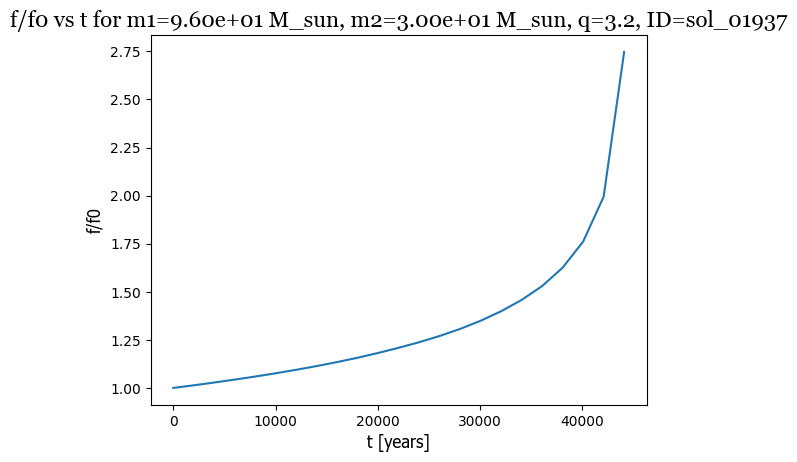

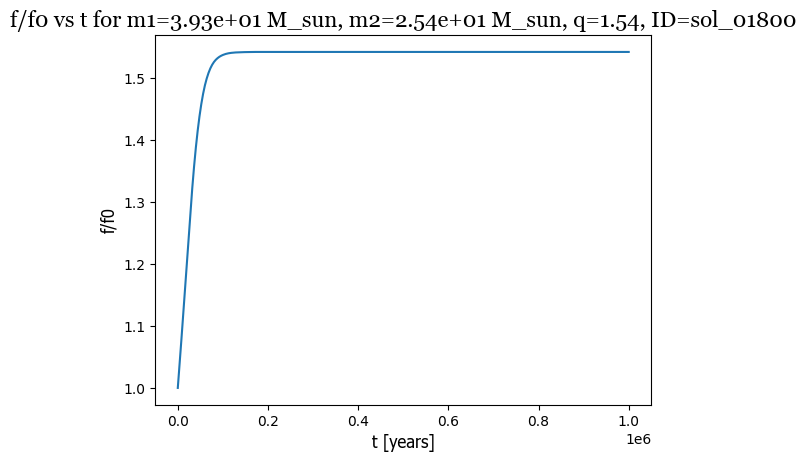

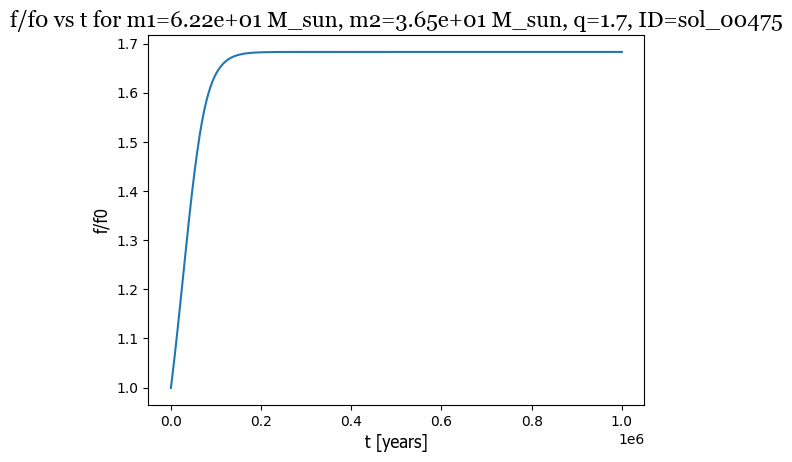

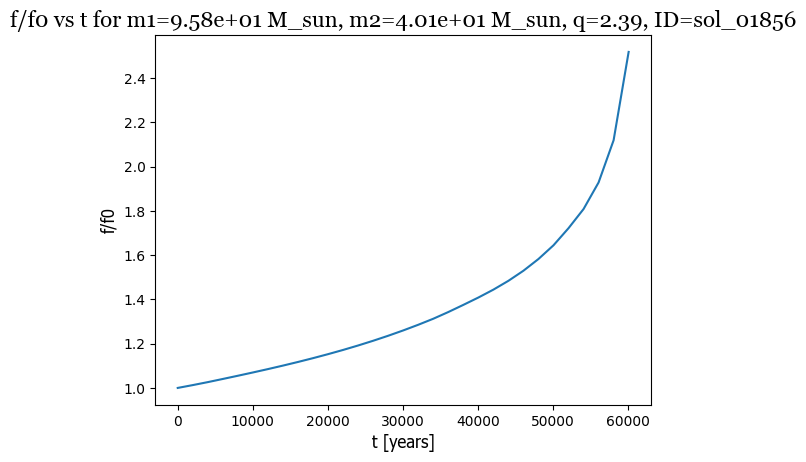

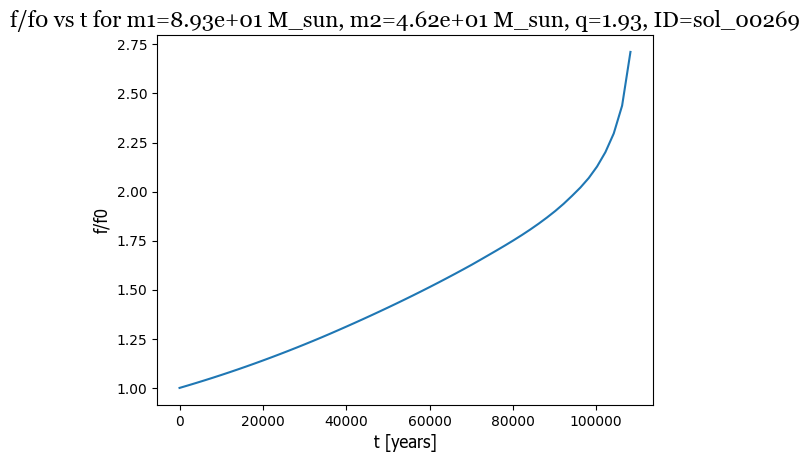

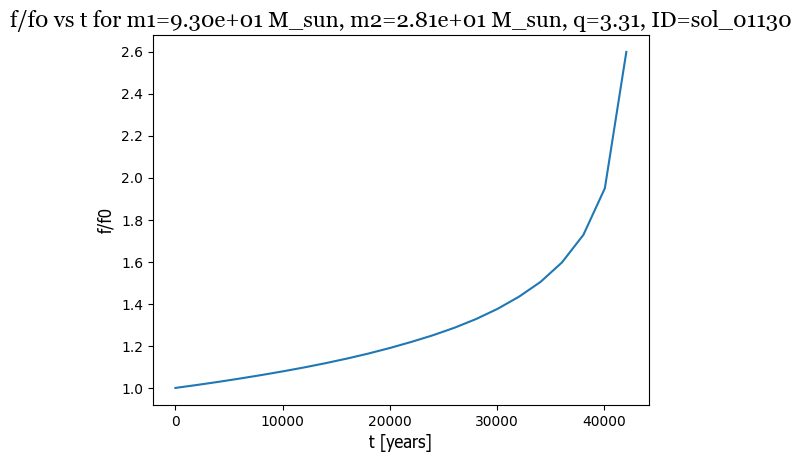

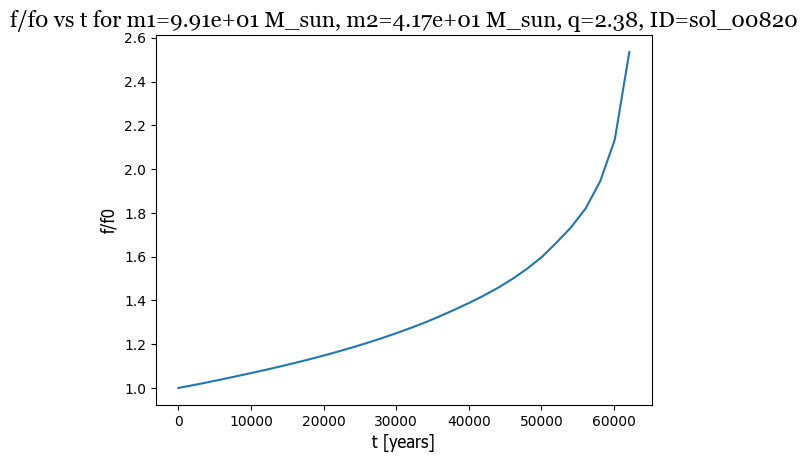

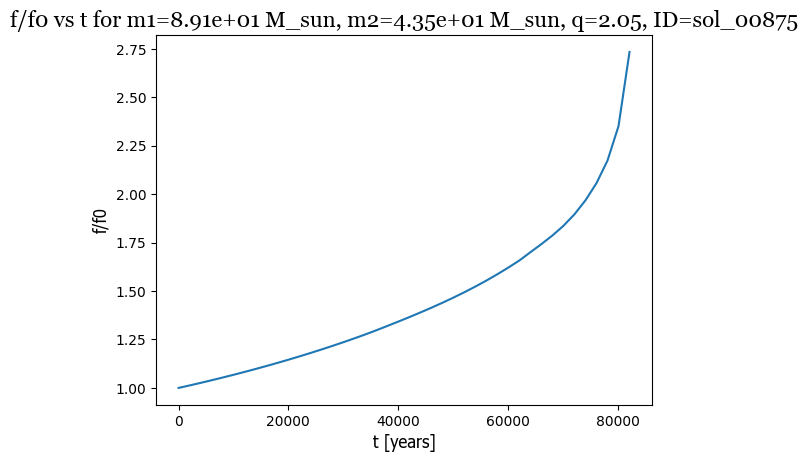

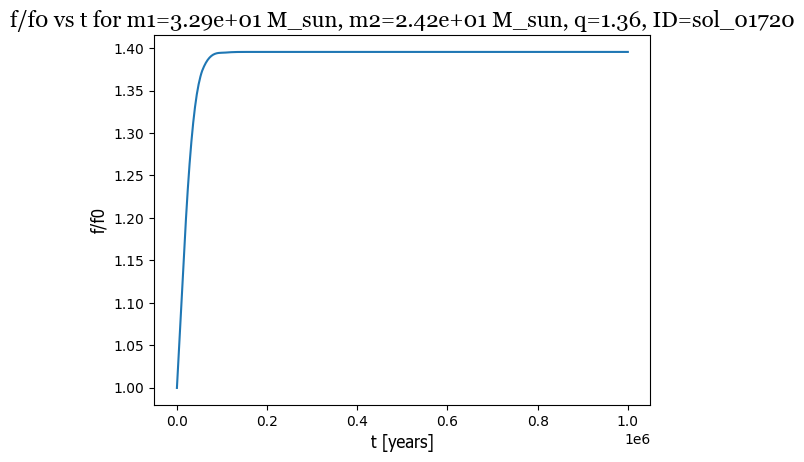

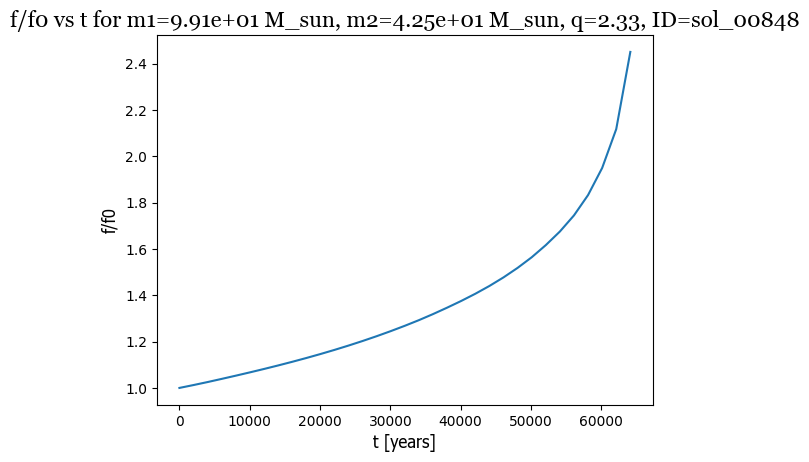

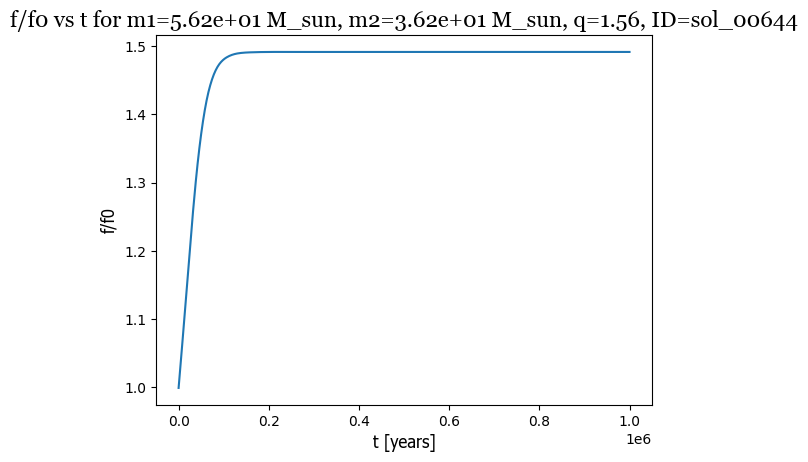

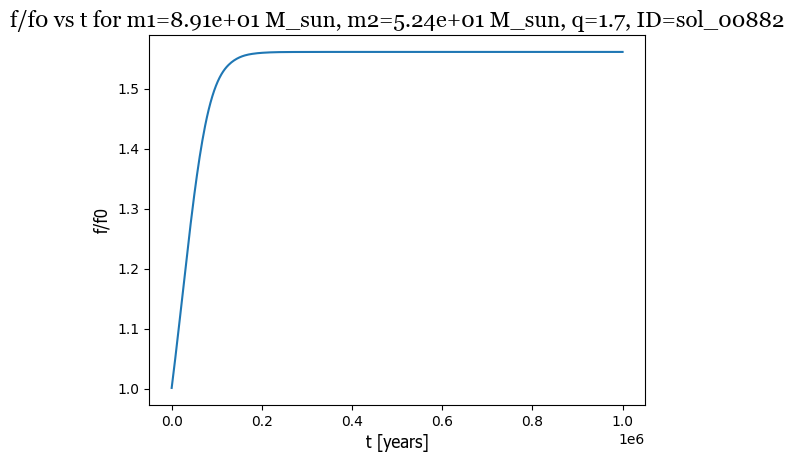

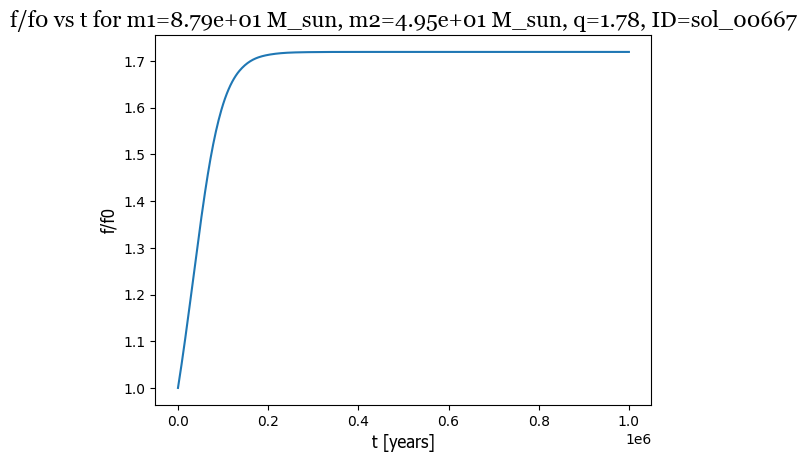

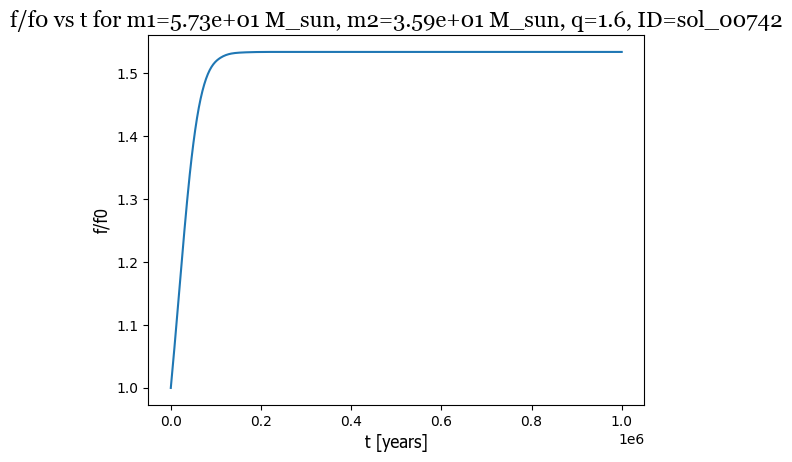

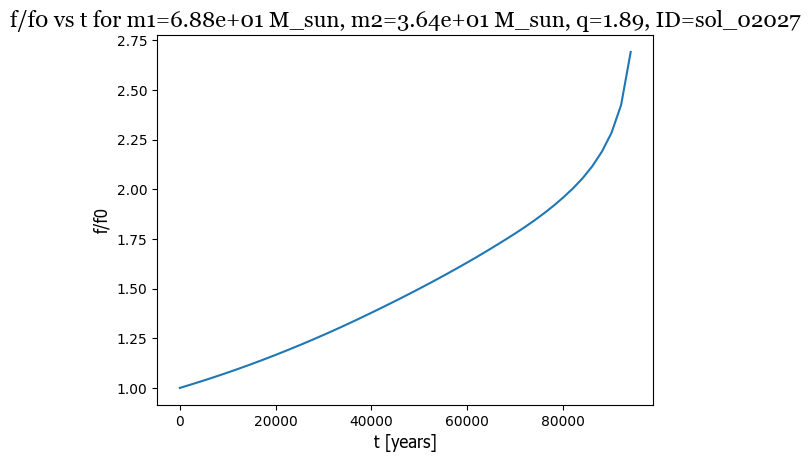

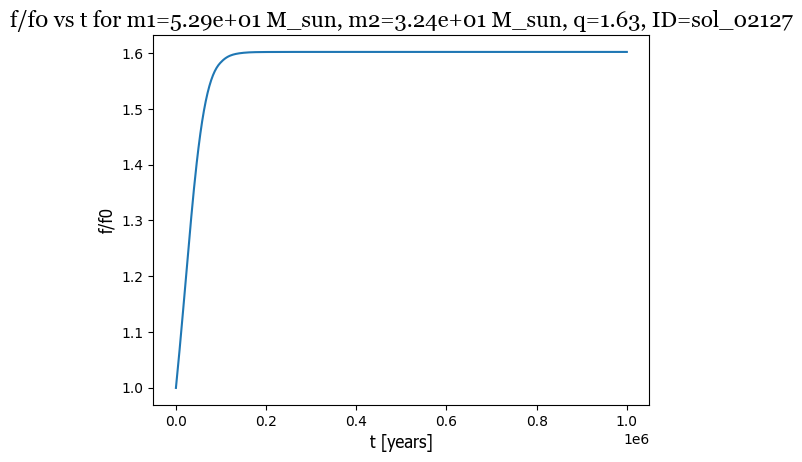

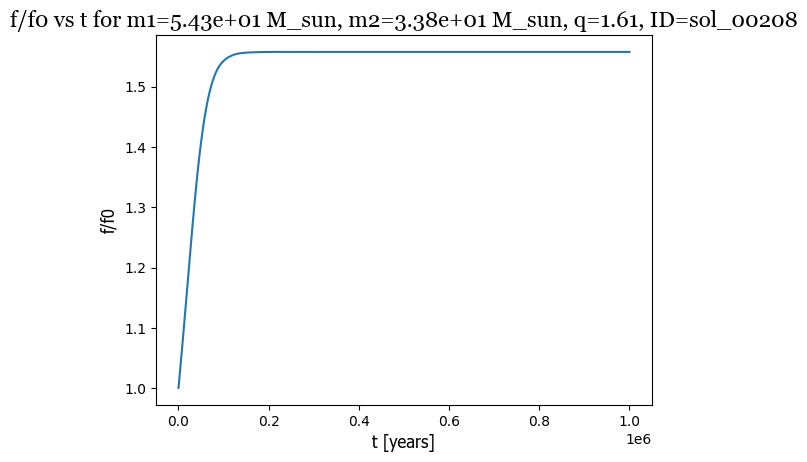

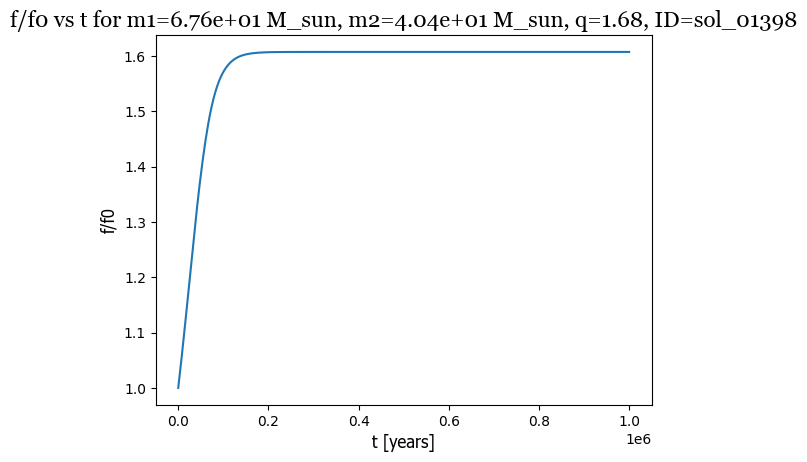

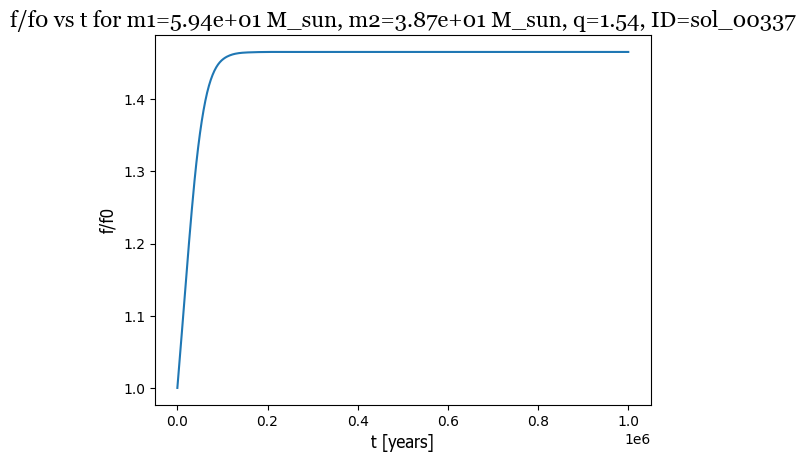

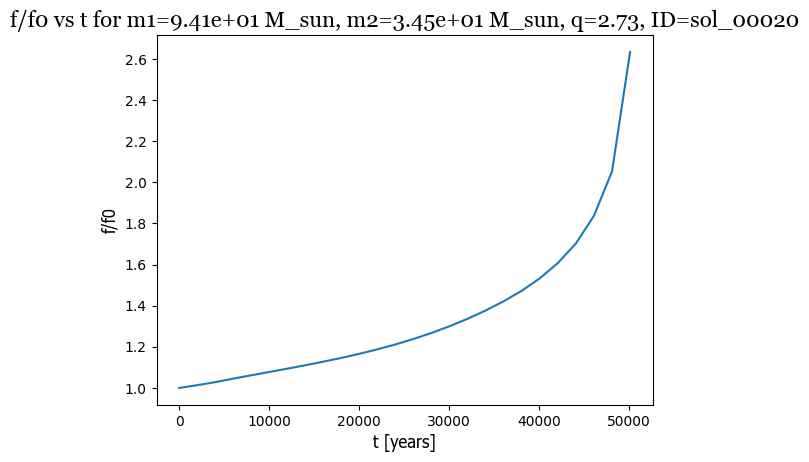

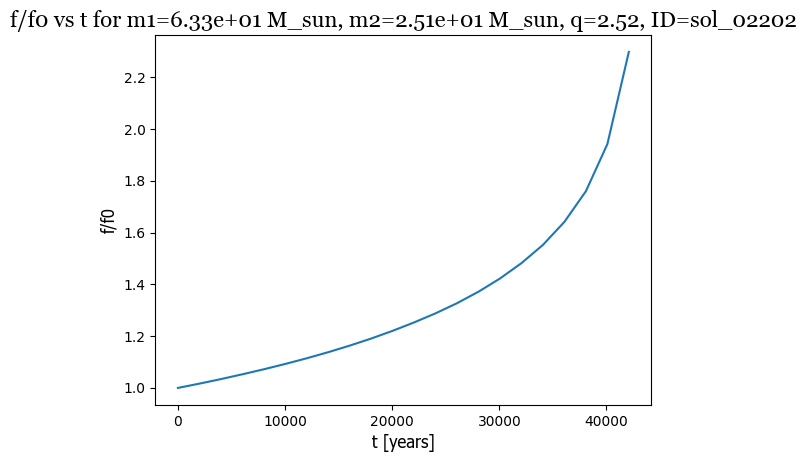

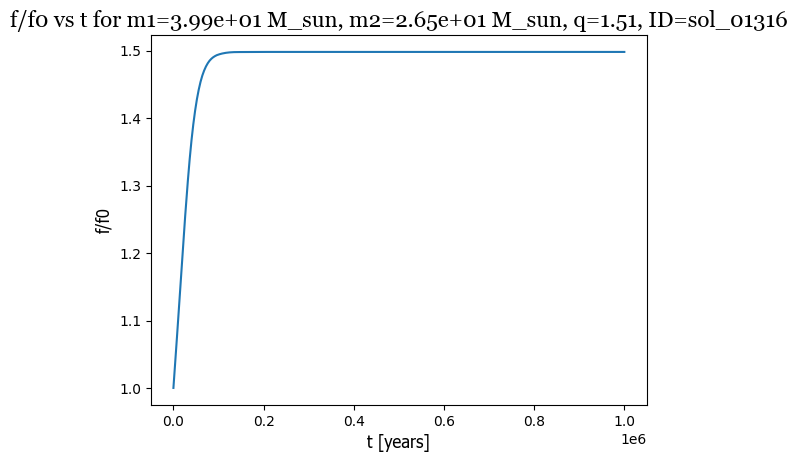

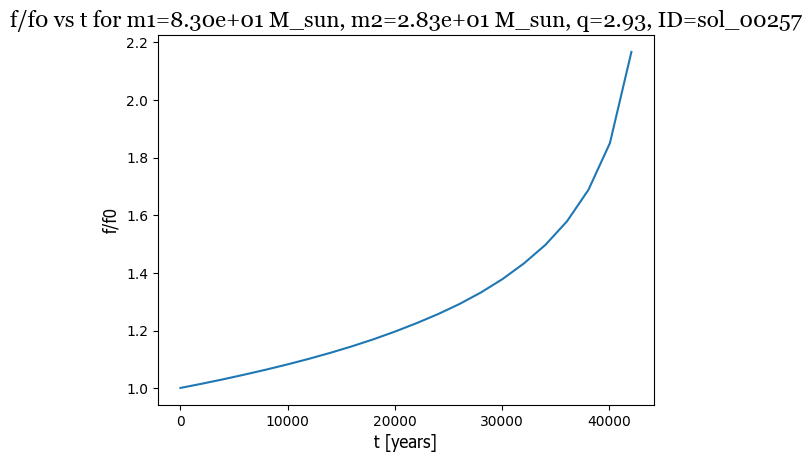

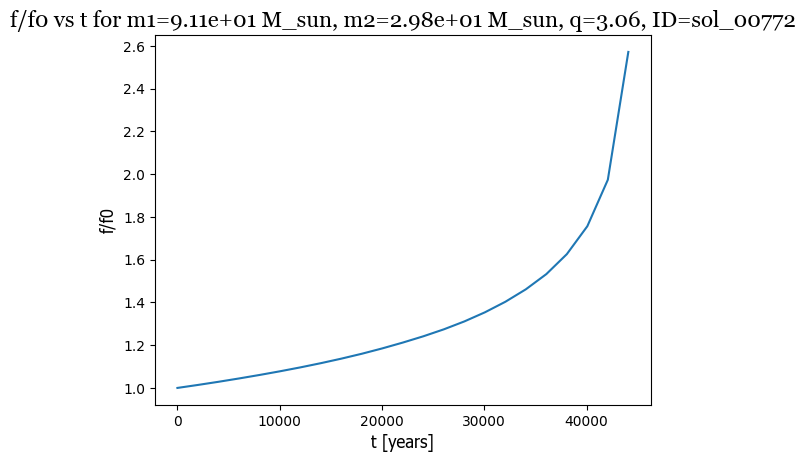

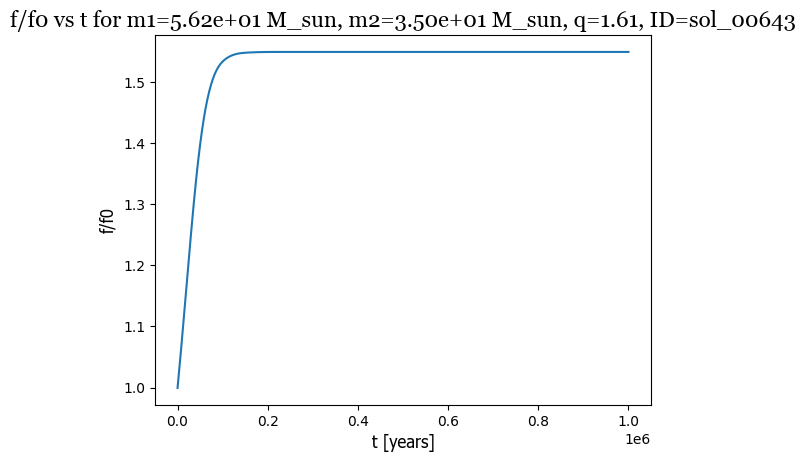

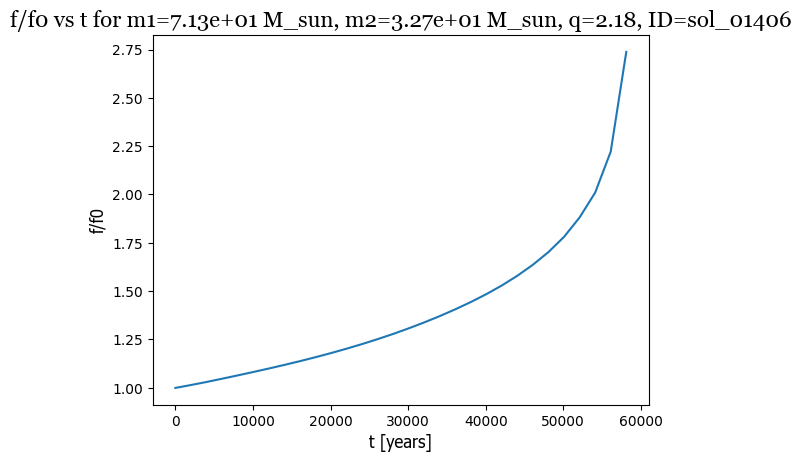

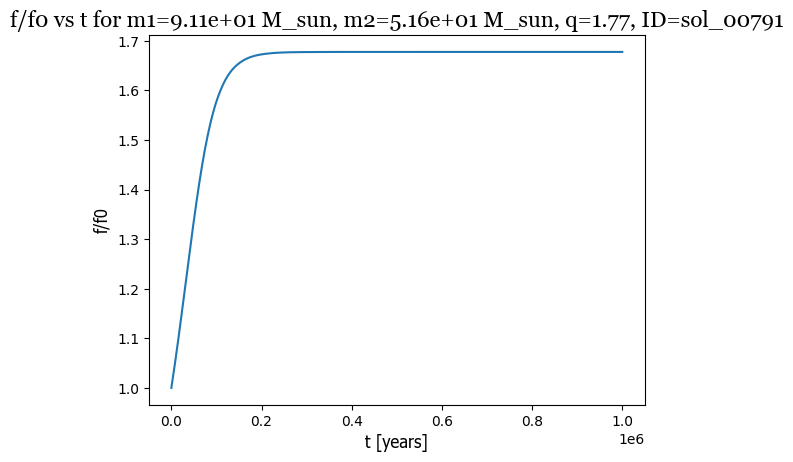

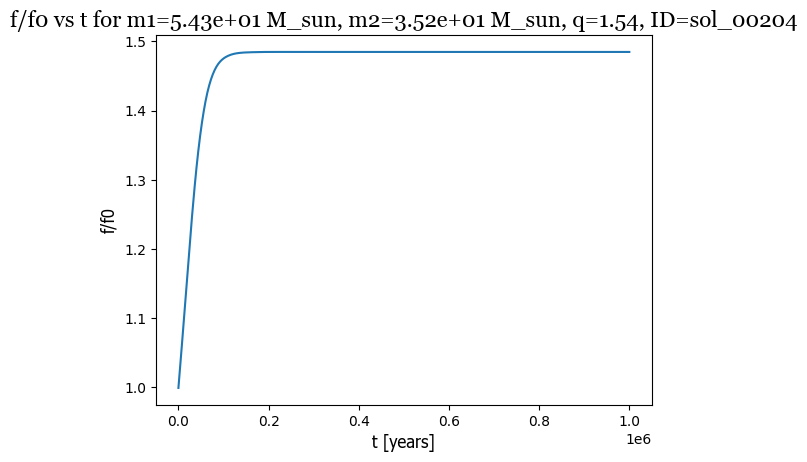

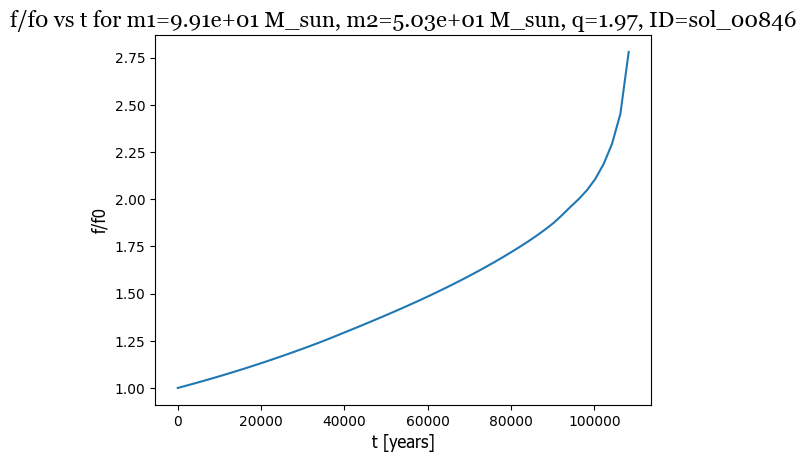

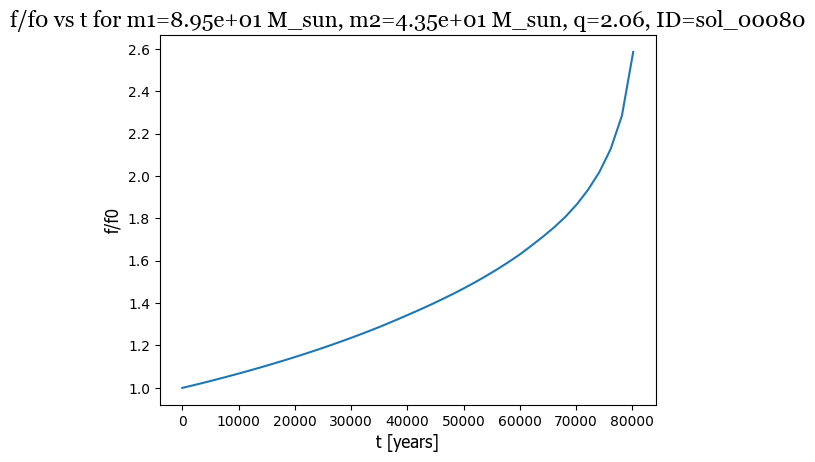

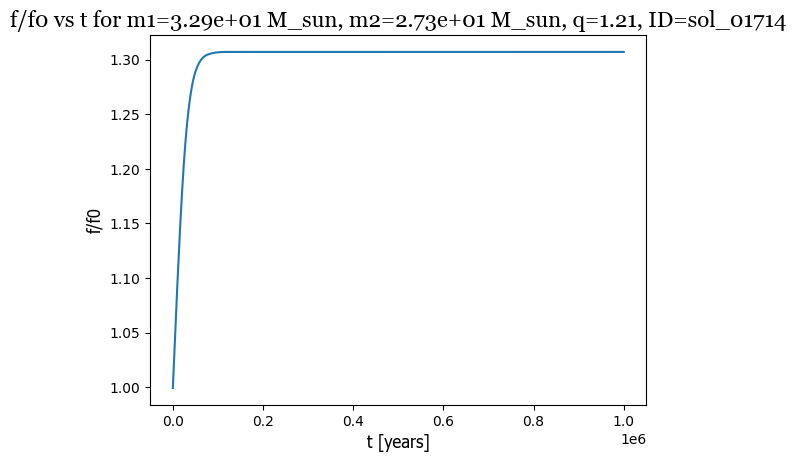

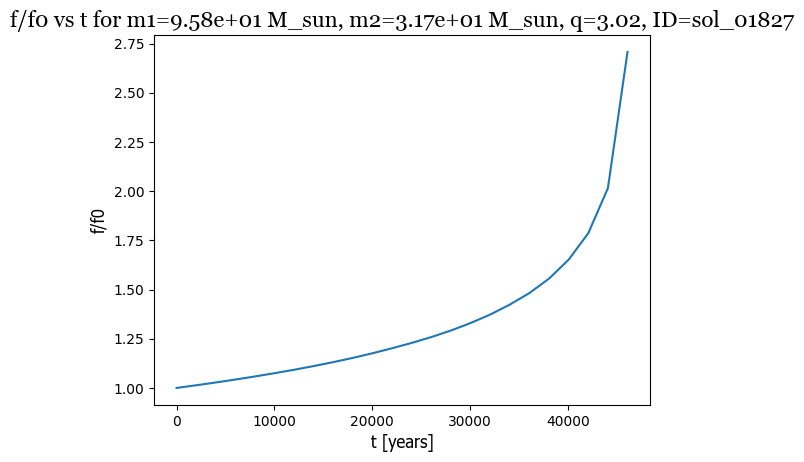

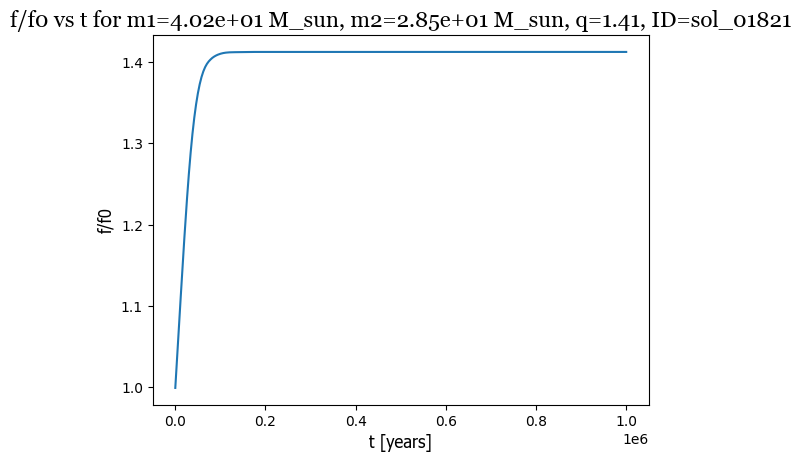

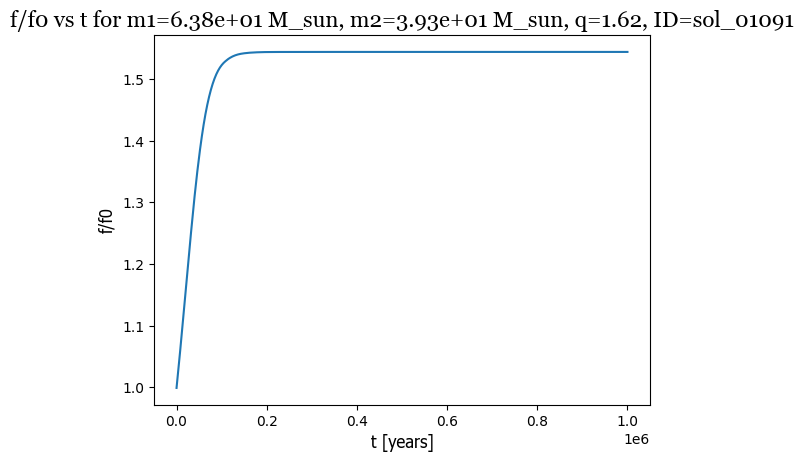

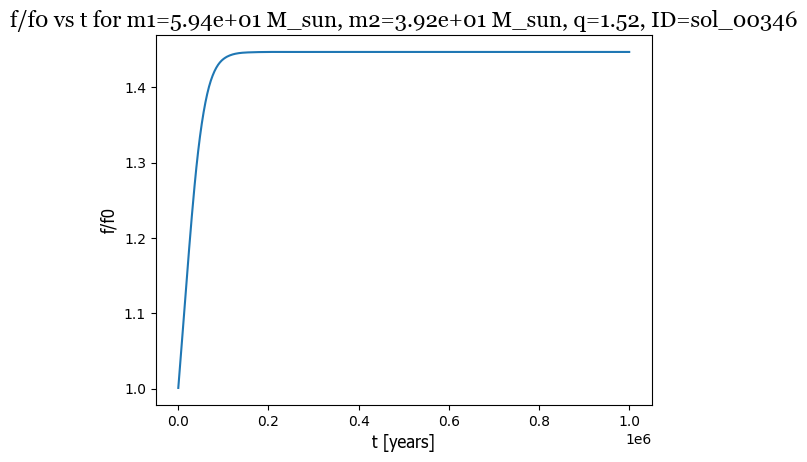

In [12]:
import random

with open("freq_ok.csv", "r") as o:
    rows = list(csv.DictReader(o))

    for row in random.sample(rows, 50):

        sol_id = row["ID"]

        data = np.load(f"solutions/{sol_id}.npz")
        t = data["t"]
        f = data["f"]
        Omega = data["Omega"]

        m1 = float(row["m_WR/M_Sun"])
        m2 = float(row["m_companion/M_Sun"])
        a0 = float(row["initial separation a0 (m)"])
        Omega0 = float(row["initial spin Omega0 (Hz)"])
        f0 = float(row["initial frequency f0 (Hz)"])
        k = float(row["k"])
        Q = float(row["Q"])
        R1 = float(row["WR star Radius R_WR"])
        lifetime = float(row["lifetime (years)"])
        T_TF = float(row["tidal function timescale (years)"])
        f_final = float(row["f_final (Hz)"])
        Omega_final = float(row["Omega_final (Hz)"])
        J = float(row["final angular momentum J (kg m^2/s)"])
        a_spin = float(row["spin parameter a_spin"])
        a_final = float(row["final separation a_final (m)"])
        a_min_si = float(row["minimum separation a_min (m)"])
        q = m1/m2
        
        # plot f/f0(t)
        #p.plot2d(t, f/f0, xlabel='t [years]',
        #         ylabel='f/f0', title=f"f/f0 vs t for m1={format(m1, '.0e')} M_sun, m2={format(m2, '.0e')} M_sun, k={format(k, '.0e')}, Q={format(Q, '.0e')}, a0={format(a0, '.2e')} m, Ω0={format(Omega0, '.2e')} Hz, lifetime={format(lifetime, '.0e')} years, T_TF={format(T_TF, '.0e')} years, f0={format(f0, '.2e')} Hz, f_final={format(f_final, '.2e')} Hz, Omega_final={format(Omega_final, '.2e')} Hz", legend='f/f0(t)', colour=None, axis_font='Tahoma', axis_size=12, title_font='Georgia', title_size=16, legend_size=10)
        
        p.plot2d(t, f/f0, xlabel='t [years]',
                 ylabel='f/f0', title=f"f/f0 vs t for m1={format(m1, '.2e')} M_sun, m2={format(m2, '.2e')} M_sun, q={format(m1/m2, '.3')}, ID={format(sol_id)}", colour=None, axis_font='Tahoma', axis_size=12, title_font='Georgia', title_size=16, legend_size=10)
        
        # plot Omega(t)
        #p.plot2d(t, Omega, xlabel='t [years]',
        #         ylabel='Ω [Hz]', title=f"Ω vs t for m1={format(m1, '.0e')} M_sun, m2={format(m2, '.0e')} M_sun, k={format(k, '.0e')}, Q={format(Q, '.0e')}, a0={format(a0, '.2e')} m, Ω0={format(Omega0, '.2e')} Hz, lifetime={format(lifetime, '.0e')} years, T_TF={format(T_TF, '.0e')} years, f0={format(f0, '.2e')} Hz, f_final={format(f_final, '.2e')} Hz, Omega_final={format(Omega_final, '.2e')} Hz", legend='Ω(t)', colour=None, axis_font='Tahoma', axis_size=12, title_font='Georgia', title_size=16, legend_size=10)

In [13]:
# exact re-integration of freq_ok solutions with new lifetime

import functions as fct
import ODE_solver as odes
import numpy as np
import csv
import os

os.makedirs("solutions2", exist_ok=True)

# constants
G = 6.674e-11
Msolar = 1.989e30
Rsolar = 6.957e8
c = 299792458.0

# new lifetime
lifetime = 1.5e6  # years
tfinal = lifetime * 365.25 * 24 * 3600

# read original solutions
with open("freq_ok.csv", newline="") as fin:
    reader = csv.DictReader(fin)
    rows = list(reader)

# output file
with open("freq_ok_redo.csv", "w", newline="") as fout:
    writer = csv.writer(fout)
    writer.writerow(reader.fieldnames)

    for row in rows:
        # reuse original ID
        sol_id = row["ID"]

        # read parameters directly
        m1 = float(row["m_WR/M_Sun"]) * Msolar
        m2 = float(row["m_companion/M_Sun"]) * Msolar
        k = float(row["k"])
        Q = float(row["Q"])
        a0 = float(row["initial separation a0 (m)"])
        Omega0 = float(row["initial spin Omega0 (Hz)"])

        rg2 = 0.1
        q = m1 / m2

        RWR1 = fct.radius_from_mass(m1 / Msolar)
        R1 = RWR1 * Rsolar

        f0 = fct.gw_frequency(a0, m1, m2)
        fmin = float(row["f_min (Hz)"])

        T_TF = fct.tidal_friction_timescale(
            m1, m2, Q, k, a0, RWR1, f0
        ) / (3600 * 24 * 365.25)

        K1 = (18*k/Q) * (m2 * np.pi**(13/3) * R1**5) / (
            G**(5/3) * m1 * rg2 * (m1 + m2)**(5/3)
        )
        K2 = (3*k/Q) * (m2**2 * np.pi**3 * R1**3) / (
            G * m1 * rg2 * (m1 + m2)**2
        )

        def dfdt(f, Omega):
            return K1 * f**(13/3) * (f/2 - Omega)

        def dOmegadt(f, Omega):
            return K2 * f**3 * (f/2 - Omega)

        sols = odes.solve_Radau(
            dxdt=dfdt,
            dydt=dOmegadt,
            x0=f0,
            y0=Omega0,
            t0=0,
            tfinal=tfinal,
            x_scale=1,
            y_scale=1,
            t_scale=1
        )

        t = sols[0] / (3600 * 24 * 365.25)
        f = sols[1]
        Omega = sols[2]

        J = rg2 * m1 * R1**2 * Omega[-1]
        a_spin = c * J / (G * m1 * m1)
        a_final = fct.separation_from_gw_frequency(f[-1], m1, m2)

        # update only fields affected by lifetime
        row["lifetime (years)"] = lifetime
        row["tidal function timescale (years)"] = T_TF
        row["f_final (Hz)"] = f[-1]
        row["Omega_final (Hz)"] = Omega[-1]
        row["final angular momentum J (kg m^2/s)"] = J
        row["spin parameter a_spin"] = a_spin
        row["final separation a_final (m)"] = a_final

        # save with SAME ID
        np.savez(f"solutions2/{sol_id}.npz", t=t, f=f, Omega=Omega)

        writer.writerow([row[h] for h in reader.fieldnames])


/tmp/ipykernel_4338/2608592558.py:64: RuntimeWarning: invalid value encountered in scalar power
  return K1 * f**(13/3) * (f/2 - Omega)
